In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline


In [3]:
dwayne_file = "autosaveDJO.graphml"

In [4]:
dwayne = nx.read_graphml(dwayne_file)
print(list(dwayne.nodes(data=True))[0:5])

[('100', {'label': '<Dwayne_Johnson>', 'bipartite': 0, '_depth': 0, '_expanded': 1, 'gender': 'male'}), ('101', {'label': '<Tooth_Fairy_(2010_film)>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 48000000.0, 'budget': 112500000.0}), ('102', {'label': '<Southland_Tales>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 17000000.0, 'budget': 374743.0}), ('103', {'label': '<Gridiron_Gang>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 30000000.0, 'budget': 179480851.0}), ('104', {'label': '<San_Andreas_(film)>', 'bipartite': 1, '_depth': 1, '_expanded': 1, 'gross': 110000000.0, 'budget': 474000000.0})]


In [5]:
movies = [node for node, nodedata in dwayne.nodes(data=True) if nodedata['bipartite'] == 1]

In [6]:
movieProjection = nx.bipartite.weighted_projected_graph(dwayne, movies)
filtered = nx.Graph(movieProjection)

to_remove = [(n1, n2) for n1,n2,data in movieProjection.edges(data=True) if data['weight'] < 2]
filtered.remove_edges_from(to_remove)
giant_cc_nodes = max(nx.connected_components(filtered), key = len)
filtered2 = filtered.subgraph(giant_cc_nodes)
labels = {nodeId:data['label'] for nodeId, data in filtered2.nodes(data=True)}

#remove 0 budget



In [9]:
filtered3 = filtered2.copy()

print(len(filtered2.nodes(data=True)))
NanMovies = [n1 for n1, data in filtered2.nodes(data=True) if np.isnan(data['gross']) or np.isnan(data['budget'])]
#len(NanMovies)

filtered3.remove_nodes_from(NanMovies)


296


In [10]:
print(len(filtered2 ) == len(filtered3))

False


In [11]:
movies = [(node,nodedata) for node, nodedata in filtered3.nodes(data=True) if nodedata['bipartite'] == 1]


In [12]:
names = {movie:data['label'] for movie, data in movies}

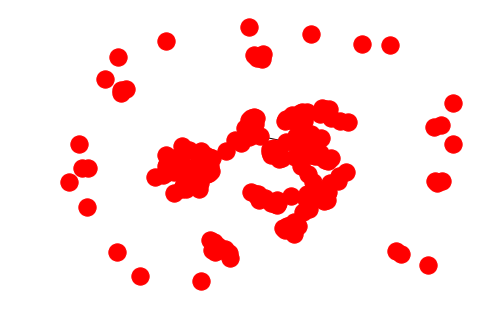

In [67]:
nx.set_node_attributes(filtered3, names, name = "Names")


nx.draw(filtered3)

nx.write_graphml(filtered3, "DwayneJohnsonMOVIESFiltered.graphml")
